# ML Manual

### 실습(5)
 데이터 스케일링 

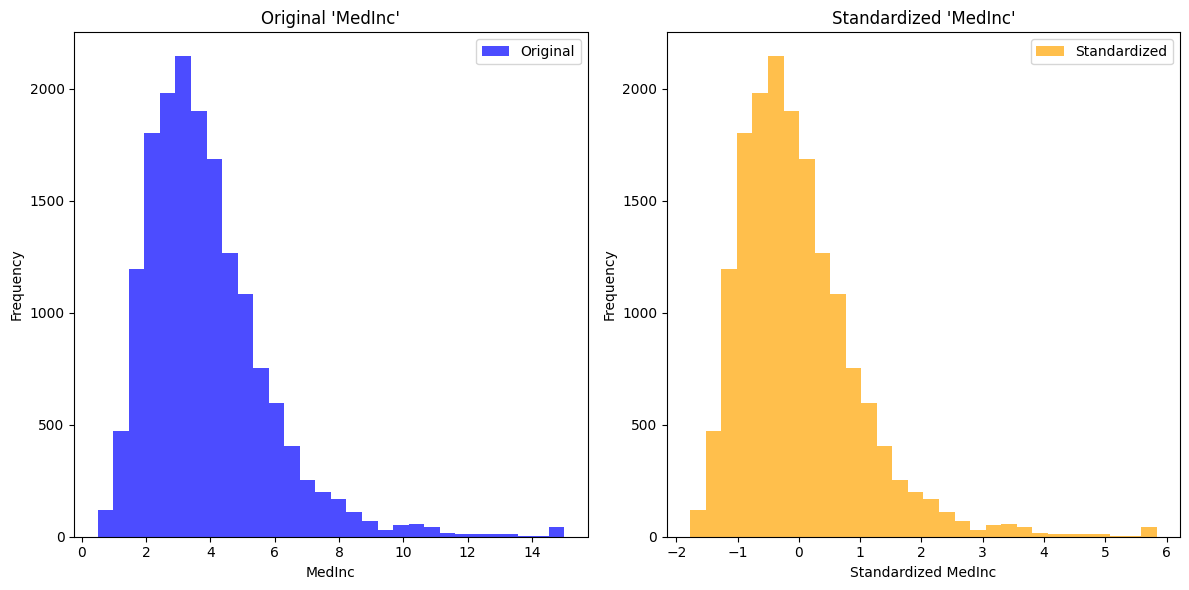

Original MedInc's Mean: 3.88
Original MedInc's Stdev: 1.90
Scaled MedInc's Mean: -0.00
Scaled MedInc's Stdev: 1.00


In [19]:
# 표준화
# -  표준화는 데이터의 평균을 0, 표준편차를 1인 정규분포의 형태로 변환하는 방법이다.
# -  정규 분포의 형태로 변환된다는 장점이 있지만 데이터의 평균을 이용하기 때문에 이상치가 있다면 스케일링 결과에 영향을 끼칠 수 있다.


import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
housing = fetch_california_housing()
data = housing.data
target = housing.target

# 데이터프레임 생성
df_X = pd.DataFrame(data, columns=housing.feature_names)
df_y = pd.DataFrame(target, columns=["Target"])


# 데이터 분할 (train-test split)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# 데이터 스케일링
S_scaler = StandardScaler()
X_train_scale = pd.DataFrame(S_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(S_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)



import matplotlib.pyplot as plt

# 원본 데이터 (MedInc 열)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['MedInc'], bins=30, color='blue', alpha=0.7, label="Original")
plt.title("Original 'MedInc'")
plt.xlabel("MedInc")
plt.ylabel("Frequency")
plt.legend()

# 표준화된 데이터 (MedInc 열)
plt.subplot(1, 2, 2)
plt.hist(X_train_scale['MedInc'], bins=30, color='orange', alpha=0.7, label="Standardized")
plt.title("Standardized 'MedInc'")
plt.xlabel("Standardized MedInc")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()



# 원본 데이터 평균과 표준편차
original_mean = X_train['MedInc'].mean()
original_stdev = X_train['MedInc'].std()

print(f"Original MedInc's Mean: {original_mean:.2f}")
print(f"Original MedInc's Stdev: {original_stdev:.2f}")

# 표준화된 데이터 평균과 표준편차
scaled_mean = X_train_scale['MedInc'].mean()
scaled_stdev = X_train_scale['MedInc'].std()

print(f"Scaled MedInc's Mean: {scaled_mean:.2f}")
print(f"Scaled MedInc's Stdev: {scaled_stdev:.2f}")



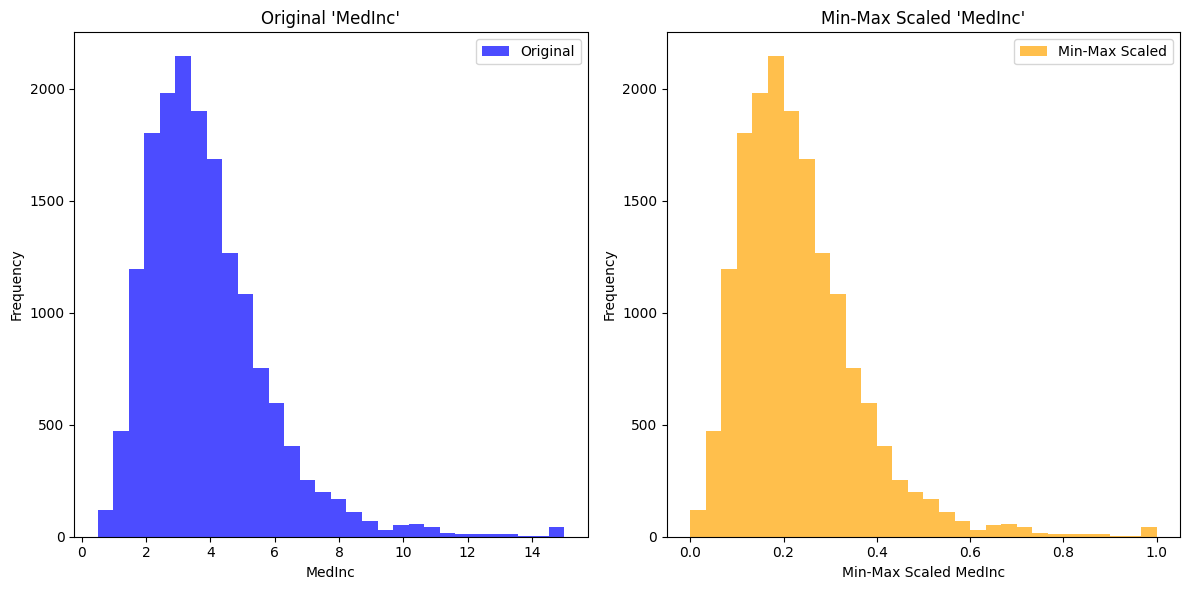

Original MedInc's Min: 0.50
Original MedInc's Max: 15.00
Scaled MedInc's Min: 0.00
Scaled MedInc's Max: 1.00


In [18]:
# 정규화
# -  정규화는 데이터의 최소값을 0, 최대값을 1로 변환하여 모든 특성들의 범위를 0부터 1사이로  변환하는 방법이다.
# -  데이터의 최대, 최소값을 이용하기 때문에 하나의 이상치가 있더라도 스케일링 결과에 크게 영향을 끼칠 수 있다.


import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
housing = fetch_california_housing()
data = housing.data
target = housing.target

# 데이터프레임 생성
df_X = pd.DataFrame(data, columns=housing.feature_names)
df_y = pd.DataFrame(target, columns=["Target"])

# 데이터 분할 (train-test split)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# 데이터 스케일링 (Min-Max Scaling)
M_scaler = MinMaxScaler()
X_train_scale = pd.DataFrame(M_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(M_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


import matplotlib.pyplot as plt

# 원본 데이터 (MedInc 열)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['MedInc'], bins=30, color='blue', alpha=0.7, label="Original")
plt.title("Original 'MedInc'")
plt.xlabel("MedInc")
plt.ylabel("Frequency")
plt.legend()

# 표준화된 데이터 (MedInc 열)
plt.subplot(1, 2, 2)
plt.hist(X_train_scale['MedInc'], bins=30, color='orange', alpha=0.7, label="Min-Max Scaled")
plt.title("Min-Max Scaled 'MedInc'")
plt.xlabel("Min-Max Scaled MedInc")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


# 원본 데이터 (MedInc) Min과 Max 계산
original_min = X_train['MedInc'].min()
original_max = X_train['MedInc'].max()

print(f"Original MedInc's Min: {original_min:.2f}")
print(f"Original MedInc's Max: {original_max:.2f}")

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# 스케일링된 데이터 (MedInc) Min과 Max 계산
scaled_min = X_train_scaled['MedInc'].min()
scaled_max = X_train_scaled['MedInc'].max()

print(f"Scaled MedInc's Min: {scaled_min:.2f}")
print(f"Scaled MedInc's Max: {scaled_max:.2f}")


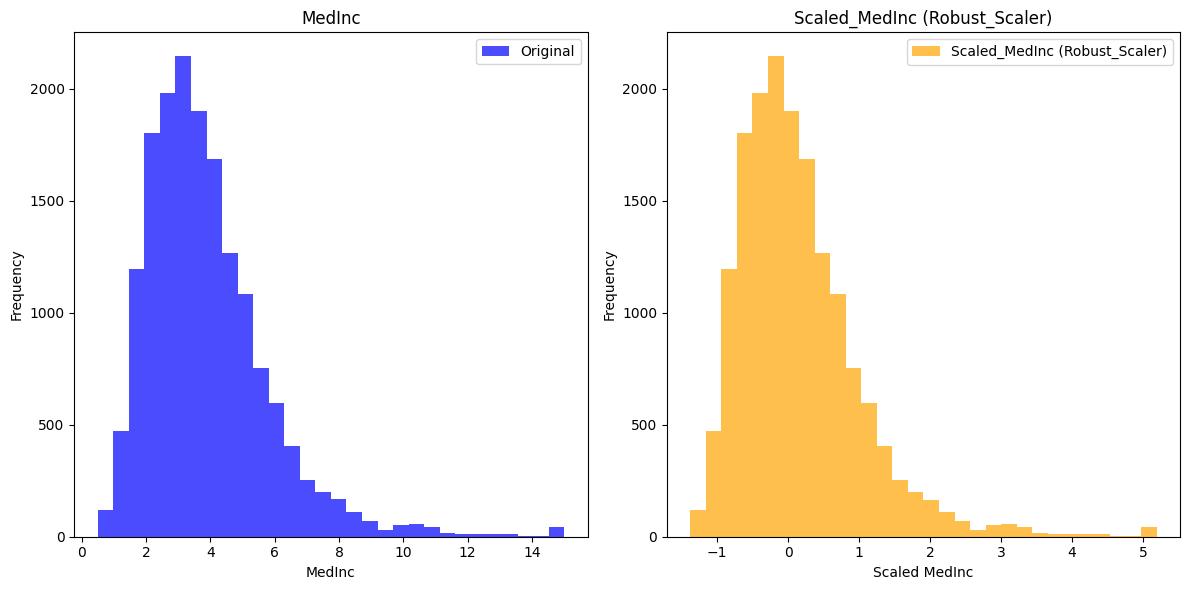

Original MedInc's Median: 3.55
Original MedInc's IQR: 2.21
Scaled MedInc's Median: 0.00
Scaled MedInc's IQR: 1.00


In [22]:
# Robust Scaling
# -  Robust Scaling은 데이터의 중앙값을 0, IQR를 1로 변환하는 방법이다.
# -  데이터의 중앙값과 IQR 값을 이용하기 때문에 이상치가 있어도 영향을 받지 않는 장점이 있다. 그러나 중앙값을 이용하기 때문에 데이터의 분포가

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# 데이터 로드
housing = fetch_california_housing()
data = housing.data
target = housing.target

# 데이터프레임 생성
df_X = pd.DataFrame(data, columns=housing.feature_names)
df_y = pd.DataFrame(target, columns=["Target"])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# RobustScaler 적용
R_scaler = RobustScaler()
X_train_scaled = pd.DataFrame(R_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)



# 히스토그램 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터
plt.subplot(1, 2, 1)
plt.hist(X_train['MedInc'], bins=30, color='blue', alpha=0.7, label="Original")
plt.title("MedInc")
plt.xlabel("MedInc")
plt.ylabel("Frequency")
plt.legend()

# 스케일링된 데이터
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled['MedInc'], bins=30, color='orange', alpha=0.7, label="Scaled_MedInc (Robust_Scaler)")
plt.title("Scaled_MedInc (Robust_Scaler)")
plt.xlabel("Scaled MedInc")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


# 원본 데이터 (MedInc)의 Median과 IQR
original_median = X_train['MedInc'].median()
Q1 = X_train['MedInc'].quantile(0.25)
Q3 = X_train['MedInc'].quantile(0.75)
original_iqr = Q3 - Q1

print(f"Original MedInc's Median: {original_median:.2f}")
print(f"Original MedInc's IQR: {original_iqr:.2f}")

# 스케일링된 데이터 (MedInc)의 Median과 IQR
scaled_median = X_train_scaled['MedInc'].median()
Q1_scaled = X_train_scaled['MedInc'].quantile(0.25)
Q3_scaled = X_train_scaled['MedInc'].quantile(0.75)
scaled_iqr = Q3_scaled - Q1_scaled

print(f"Scaled MedInc's Median: {scaled_median:.2f}")
print(f"Scaled MedInc's IQR: {scaled_iqr:.2f}")
